# Exercice 0

In [1]:
import sklearn.datasets as skd
import sklearn.neighbors as nn
from sklearn import model_selection as modsel
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = skd.load_iris()

In [3]:
def get_scores(xtrain, xtest, ytrain, ytest, krange):
    scores = []
    for k in krange:
        model = nn.KNeighborsClassifier(n_neighbors=k)
        fitted = model.fit(xtrain, ytrain)
        predictions = fitted.predict(xtest)
        scores.append(np.mean(predictions == ytest))
    return scores

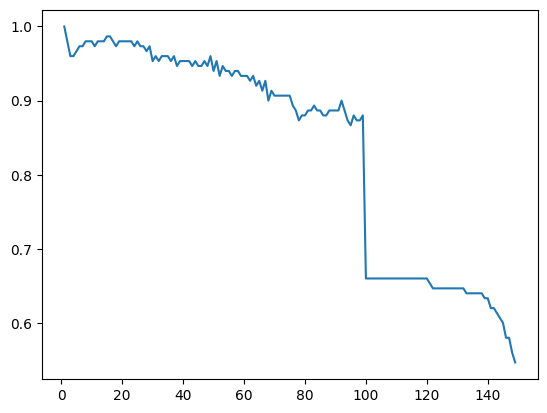

In [4]:
krange = range(1, 150)
scores = get_scores(iris["data"], iris["data"], iris["target"], iris["target"], krange)
plt.plot(krange, scores)

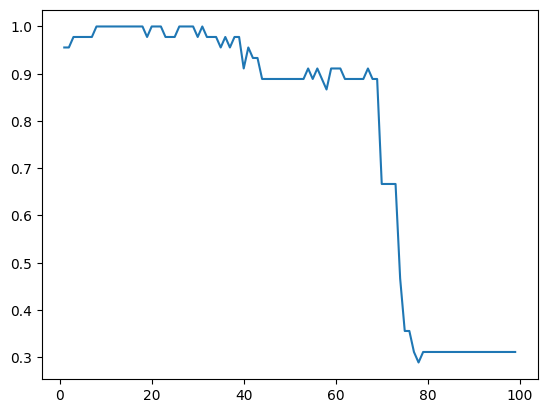

In [5]:
krange = range(1, 100) #because test_size = 0.3
X_train, X_test, y_train, y_test = modsel.train_test_split(iris["data"], iris["target"], test_size=0.3)
scores = get_scores(X_train, X_test, y_train, y_test, krange)
plt.plot(krange, scores)

In [7]:
krange = range(1, 130)
splits = modsel.StratifiedKFold(n_splits=10, shuffle=True)
param_grid = {'n_neighbors': krange}
scv = modsel.GridSearchCV(nn.KNeighborsClassifier(), param_grid, cv=splits, scoring="accuracy")
c = scv.fit(iris["data"], iris["target"])

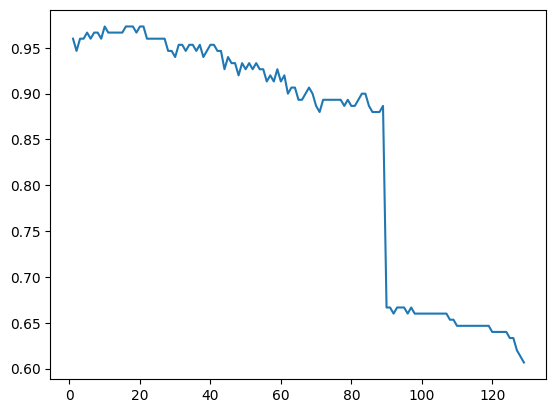

In [8]:
plt.plot(krange, c.cv_results_['mean_test_score'])

# Exercice 1

In [13]:
n, d = 500, 100
krange = [3, 7, 11, 15, 19, 23, 27]
irange = range(1, 100)
splits = modsel.KFold(n_splits=10)
param_grid = {'n_neighbors': krange}
scv = modsel.GridSearchCV(nn.KNeighborsRegressor(), param_grid, cv=splits, scoring="neg_mean_absolute_error")
res = []
for infor in irange:
    X, y = skd.make_regression(n_samples=n, n_features=d, n_informative=infor)
    c = scv.fit(X, y)
    res.append(c.cv_results_)

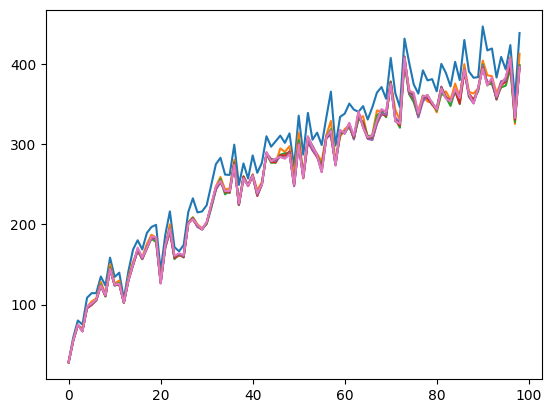

In [26]:
scores = np.empty((99, 7))
for infor in irange:
    scores[infor - 1] = np.multiply(res[infor - 1]['mean_test_score'], -1)
plt.plot(scores)

Clairement, l'erreur croît avec le nombre de variables informatives. Ce n'est pas vraiment intuitif ; je n'ai pas d'explication pour l'instant mais compte bien en trouver une :)